In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## This is a file to show how to deal with the data extracted from CMG for JD case.

In [2]:
##### Load your example csv file (shared with me via email)
df = pd.read_csv('../data/omv/JD_press_data.csv')

### Method 1: directly plot the data with scatter plot. No interpolation. No numpy array.

- Save all data in csv format.

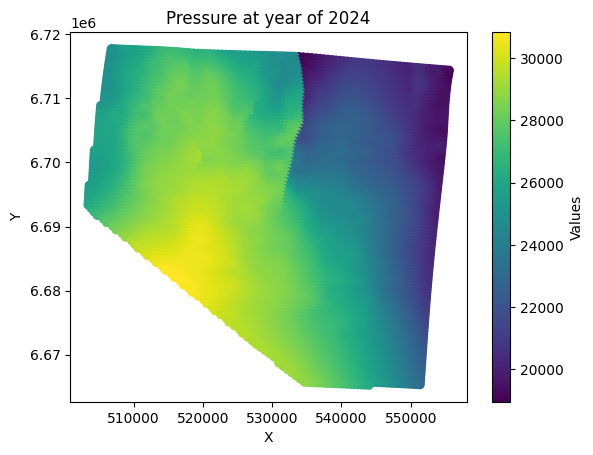

In [3]:
plt.scatter(df['X'], df['Y'], c=df['Pressure_2024-Jan-01'], cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pressure at year of 2024')
plt.show()

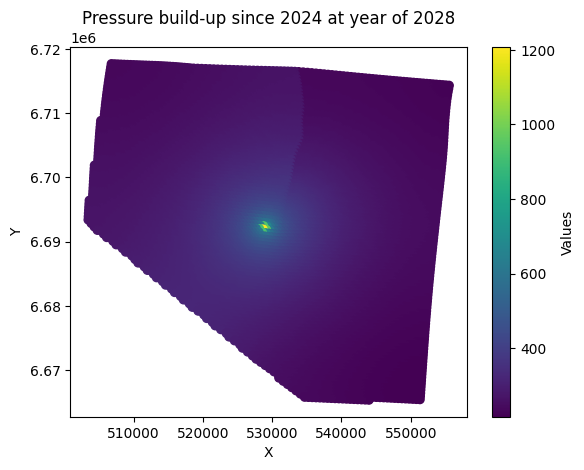

In [4]:
plt.scatter(df['X'], df['Y'], c=df['Pressure_2028-Jan-01']-df['Pressure_2024-Jan-01'], cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pressure build-up since 2024 at year of 2028')
plt.show()

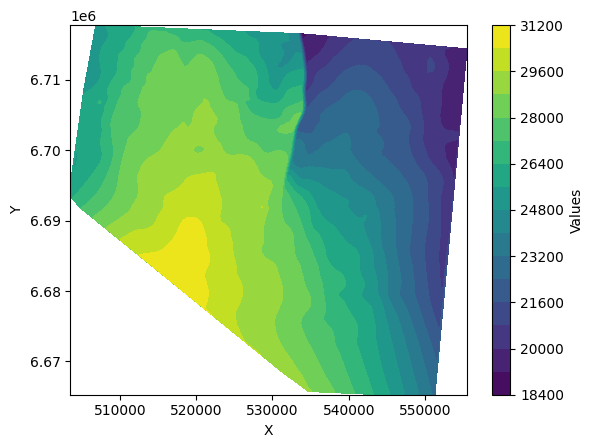

In [5]:
plt.tricontourf(df['X'], df['Y'], df['Pressure_2026-Jan-01'], levels=15, cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Method 2: when you still want to have your data in numpy format

- Do interpolations in 2D

In [6]:
from scipy.interpolate import griddata

def irreg_xy_to_arr(x, y, val, num_x, num_y, interp_method='cubic'):
    """
    interp_method = {‘linear’, ‘nearest’, ‘cubic’}
    num_x, num_y = int. Number of query pts along x or y axis.
    x, y, values = df columns
    """

    # Define grid
    xi = np.linspace(np.min(x), np.max(x), num_x)
    yi = np.linspace(np.min(y), np.max(y), num_y)
    x_new, y_new = np.meshgrid(xi, yi)

    val_new = griddata((x, y), val, (x_new, y_new), method=interp_method)

    return x_new, y_new, val_new


In [7]:
x_new, y_new, val_new = irreg_xy_to_arr(x=df['X'], y=df['Y'], val=df['Pressure_2024-Jan-01'], num_x=100, num_y=100, interp_method='cubic')

In [8]:
x_new.shape, y_new.shape, val_new.shape

((100, 100), (100, 100), (100, 100))

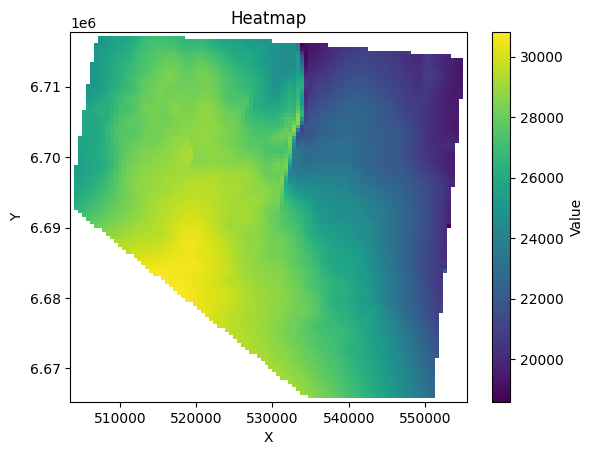

In [9]:
plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap')
plt.show()

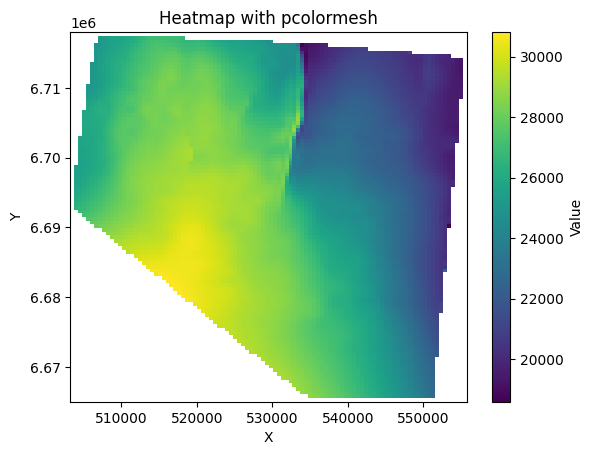

In [10]:
plt.pcolormesh(x_new, y_new, val_new, cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap with pcolormesh')
plt.show()

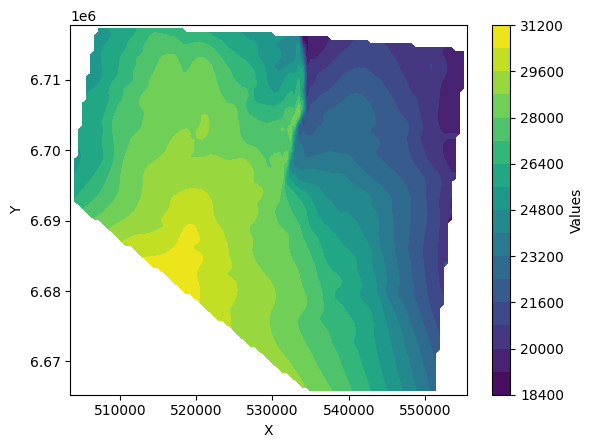

In [11]:
plt.contourf(x_new, y_new, val_new, levels=15, cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

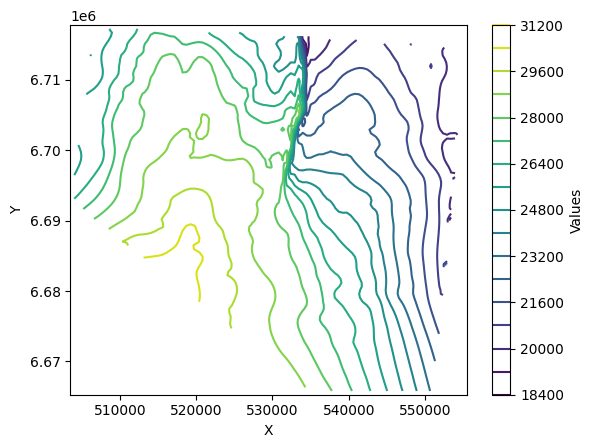

In [12]:
plt.contour(x_new, y_new, val_new, levels=15, cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

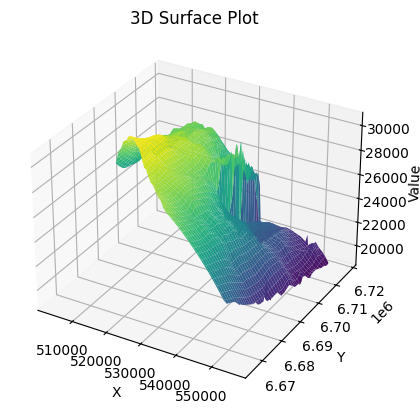

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_new, y_new, val_new, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
plt.title('3D Surface Plot')
plt.show()